# **Stock Price Prediction with ARIMA: Insights from Intel Corporation**

This project investigates the use of the AutoRegressive Integrated Moving Average (ARIMA) model to
predict stock prices for Intel Corporation. The analysis makes use of actual historical data. The
Augmented Dickey-Fuller (ADF) test is used to determine stationarity. Metrics like Mean Squared Error
(MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) are used to refine and
assess the ARIMA model, showcasing its predictive power for stock prices. The study adds to our
understanding of the dynamics of the stock market by highlighting the usefulness of using ARIMA to
achieve precise forecasting in financial analysis.



**Importing Data and Libraries**

In [20]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
uploaded = files.upload()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pylab import rcParams

df = pd.read_csv('INTC.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving INTC.csv to INTC (2).csv


**Pre-processing and Data visualization**

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
              Open         High          Low        Close    Adj Close  \
count  2998.000000  2998.000000  2998.000000  2998.000000  2998.000000   
mean     36.187091    36.571107    35.818079    36.203939    31.855212   
std      13.161824    13.342834    12.984671    13.162405    14.485111   
min      17.879999    17.920000    17.600000    17.670000    12.617670   
25%      24.129999    24.370001    23.940001    24.190001    18.861925   
50%      33.899999    34.230000    33.570002    33.950001    28.299276   
75%      48.147501    48.837501    47.650002    48.189999    45.017702   
max      68.199997    69.290001    67.309998    68.470001    66.938637   

             Volume  
count  2.998000e+03  
mean   3.584200e+07  
std    2.177456e+07  
min    5.893800e+06  
25%    2.151228e+07  
50%    2.903005e+07  
75%    4.387095e+07  
max    1.990026e+08  


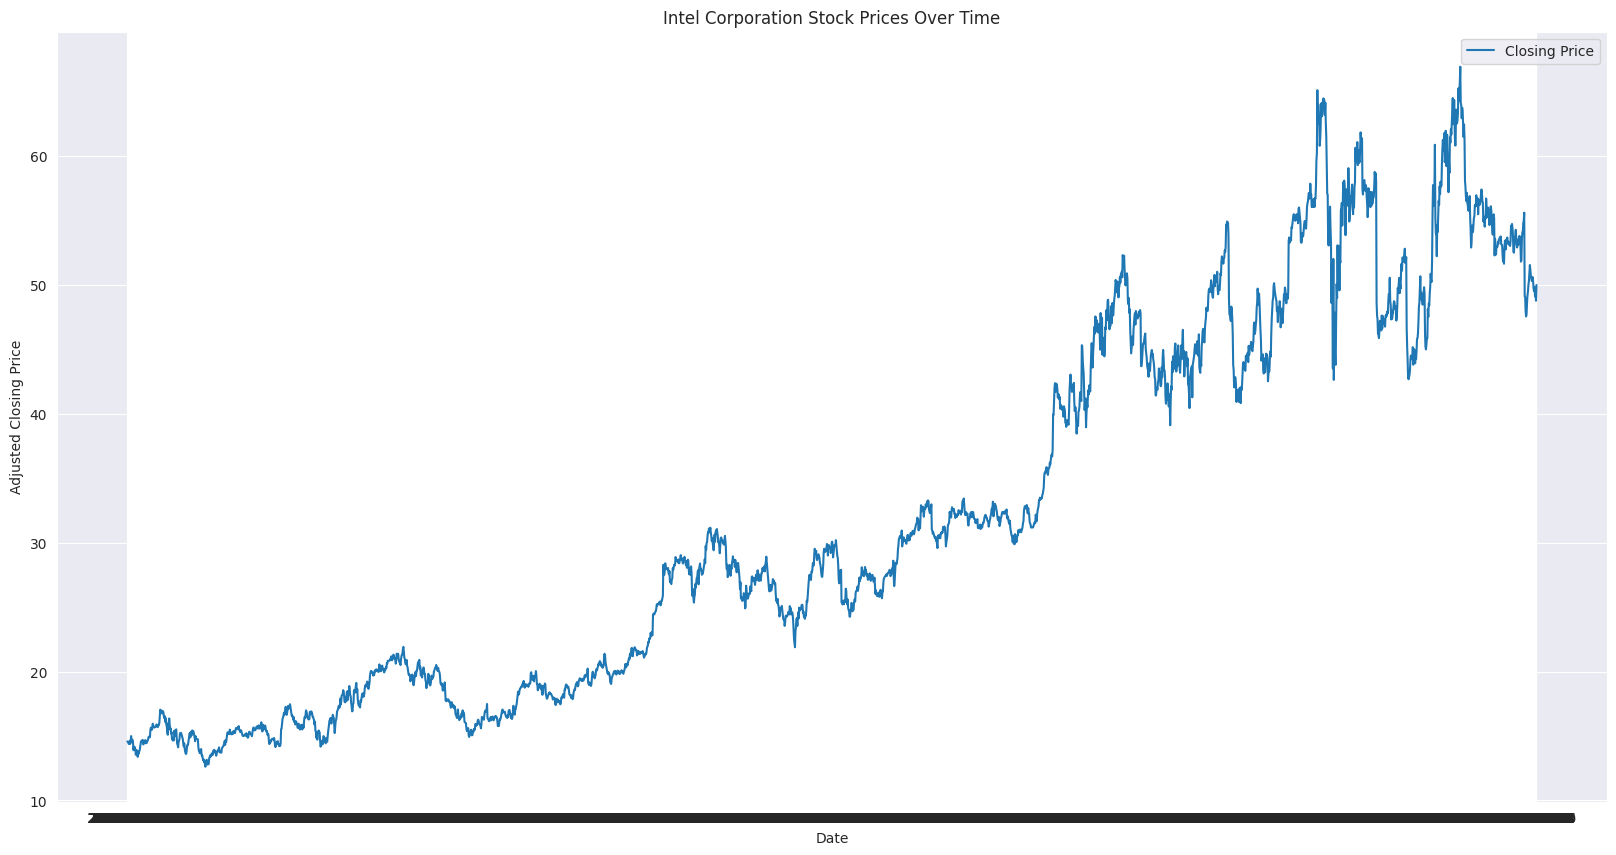

In [19]:
print(df.isnull().sum())

print(df.describe())
plt.figure(figsize=(20, 10))
sns.set_style('darkgrid')
plt.plot(df['Date'], df['Adj Close'], label='Closing Price')
plt.title('Intel Corporation Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.show()


**Separation of trend, seasonality, and residual components**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Adj Close'], model='multiplicative', period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16,9)

**Augmented Dickey-Fuller (ADF) test**

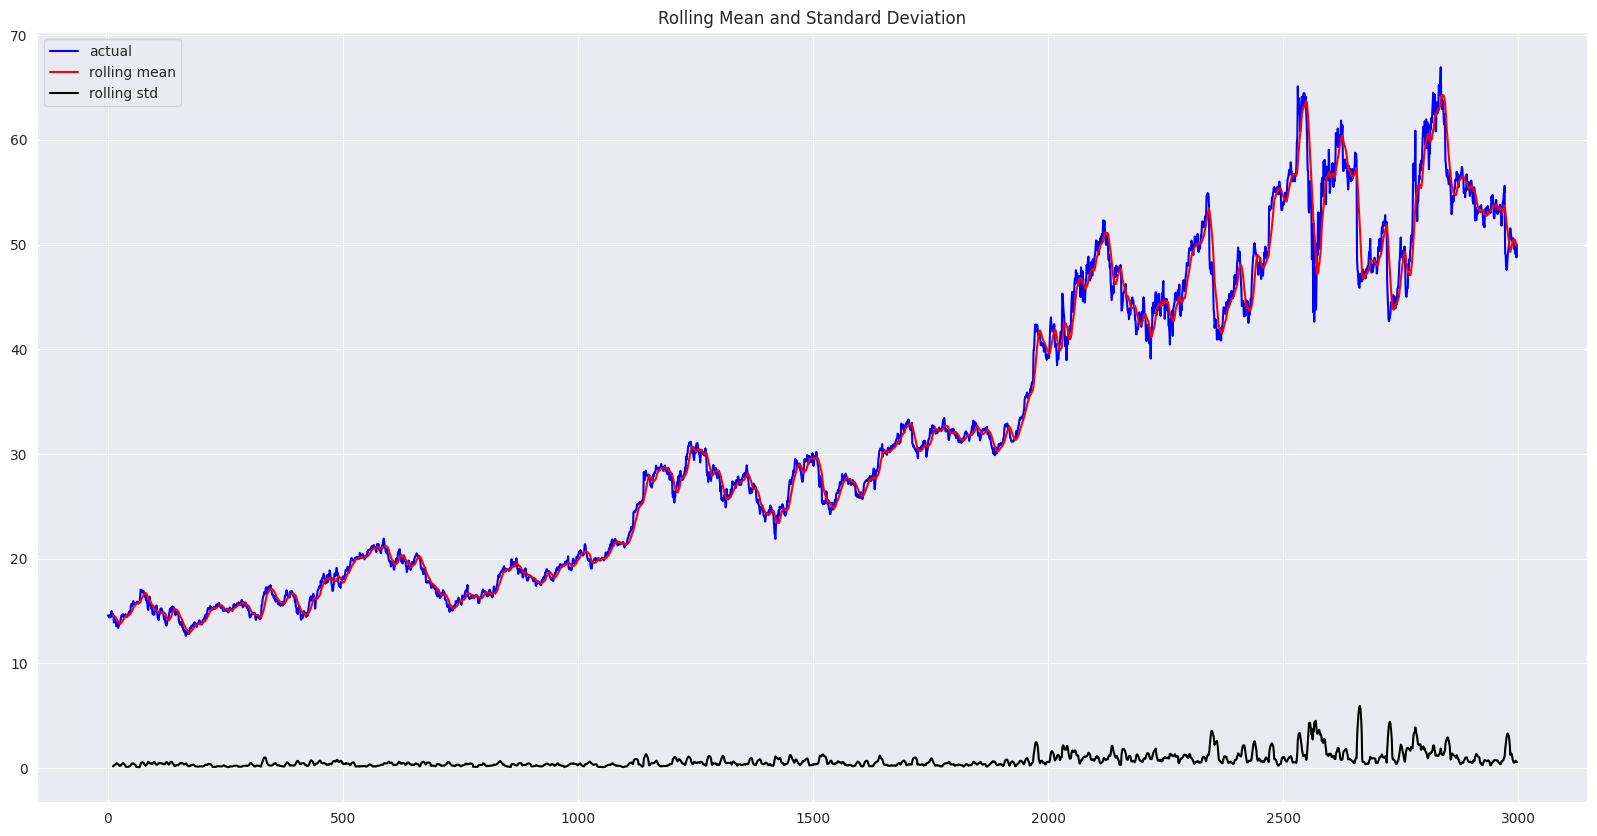

Results of dickey fuller test
Test Statistics              -1.191778
p-value                       0.677122
No. of lags used             13.000000
No. of observation used    2984.000000
Critical value (1%)          -3.432543
Critical value (5%)          -2.862509
Critical value (10%)         -2.567286
dtype: float64


In [4]:
from statsmodels.tsa.stattools import adfuller
def test_adf(timeseries):
  moving_average=timeseries.rolling(12).mean()
  moving_std=timeseries.rolling(12).std()
  plt.figure(figsize=(20,10))
  plt.plot(timeseries,color='blue',label='actual')
  plt.plot(moving_average,color='red',label='rolling mean')
  plt.plot(moving_std,color='black', label='rolling std')
  plt.legend(loc='best')
  plt.title('Rolling Mean and Standard Deviation')
  plt.show(block=False)
  print('Results of dickey fuller test')
  adft=adfuller(timeseries,autolag='AIC')
  output=pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','No. of observation used'])
  for key,value in adft[4].items():
     output['Critical value (%s)'%key]=value
  print(output)
test_adf(df['Adj Close'])



**Conversion to stationary data**


<function matplotlib.pyplot.show(close=None, block=None)>

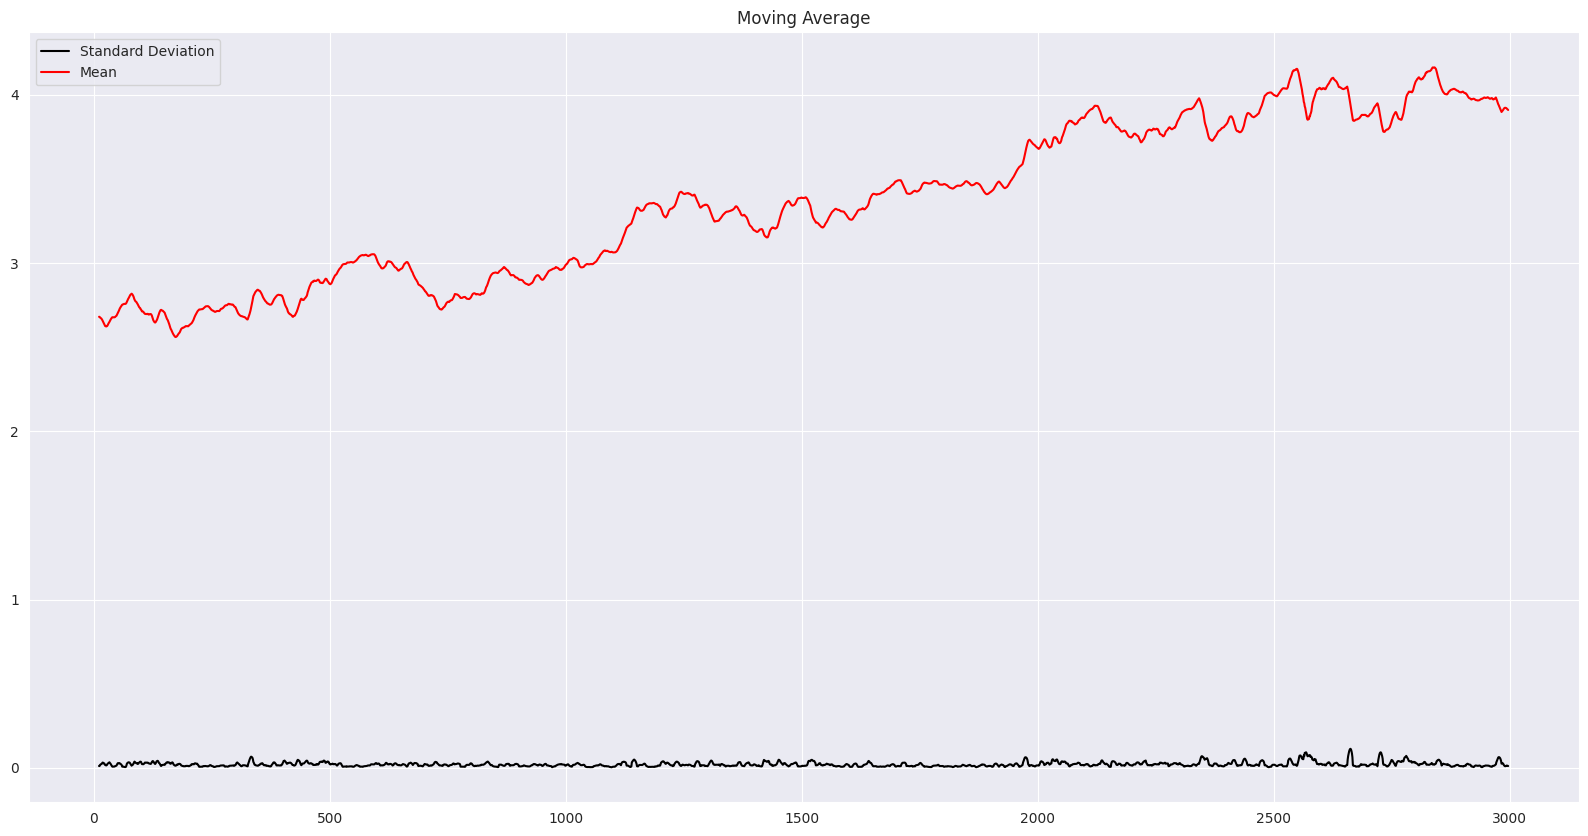

In [21]:
rcParams['figure.figsize']=20,10
Adj_Close_log=np.log(df['Adj Close'])
moving_average=Adj_Close_log.rolling(12).mean()
std_dev=Adj_Close_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color="black",label="Standard Deviation")
plt.plot(moving_average,color="red",label="Mean")
plt.legend()
plt.show

**Differencing by subtracting the 12-period moving average and new ADF test result**

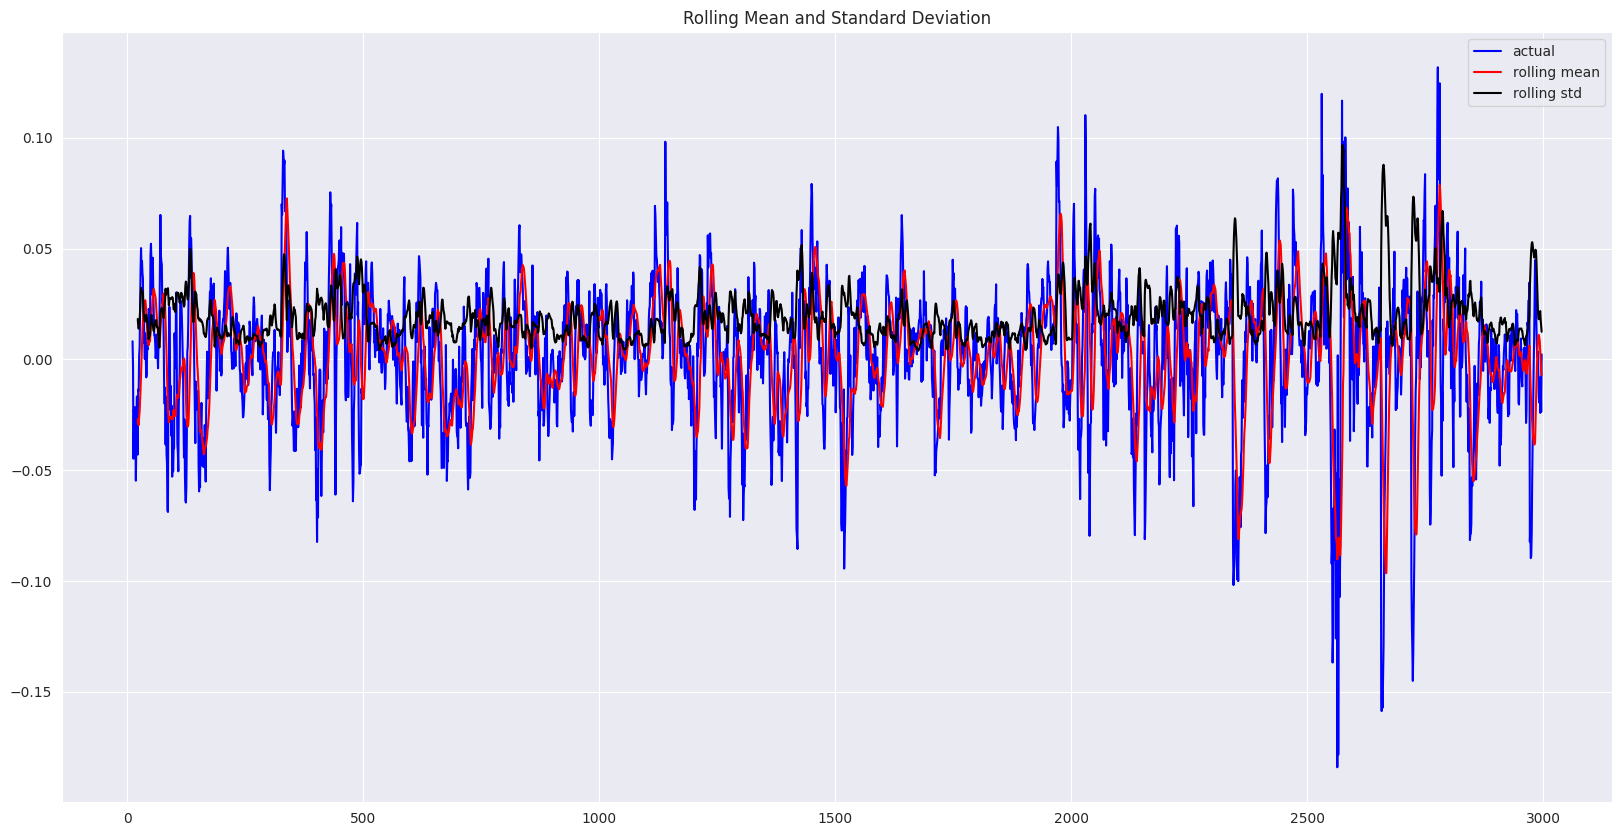

Results of dickey fuller test
Test Statistics           -1.197610e+01
p-value                    3.798649e-22
No. of lags used           1.800000e+01
No. of observation used    2.968000e+03
Critical value (1%)       -3.432555e+00
Critical value (5%)       -2.862514e+00
Critical value (10%)      -2.567289e+00
dtype: float64


In [8]:
log_minus_mean=Adj_Close_log-moving_average
log_minus_mean.dropna(inplace=True)
test_adf(log_minus_mean)

**Cross Validation**

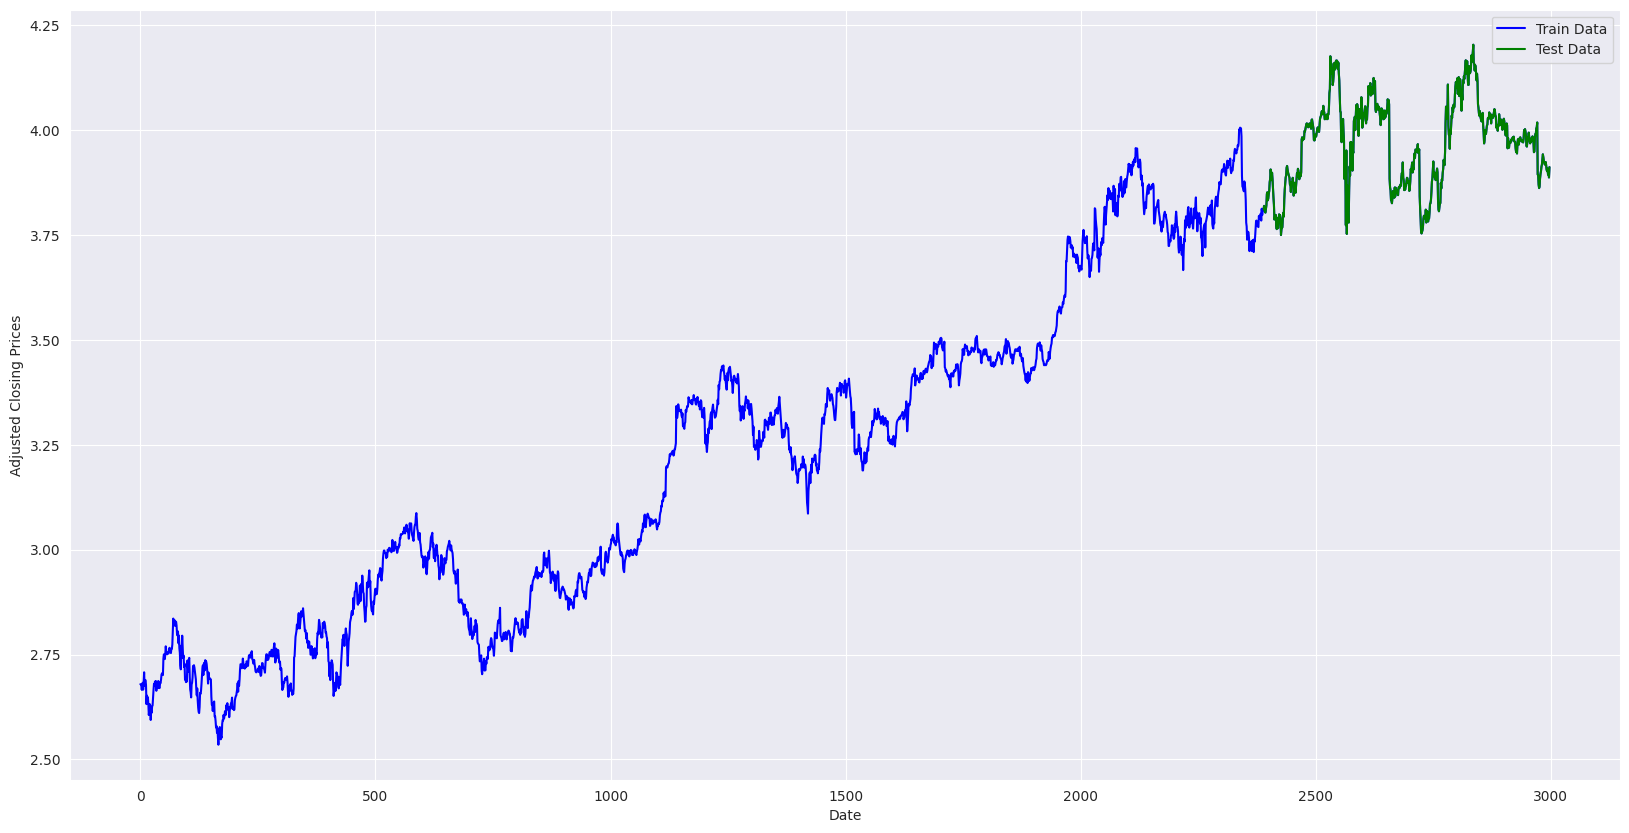

In [22]:
train_data, test_data = Adj_Close_log[:int(len(df['Adj Close'])*0.80)], Adj_Close_log[int(len(log_minus_mean)*0.80):]
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Prices')
plt.plot(Adj_Close_log, 'blue',label='Train Data')
plt.plot(test_data,'green',label='Test Data')
plt.legend()


**Implementing Arima**

In [25]:
!pip3 install arch yfinance pmdarima
from pmdarima import auto_arima

model_autoarima = auto_arima(train_data, start_p=0, start_q=0,
                             test='adf', max_p=7, max_q=7, m=1, d=None, seasonal=False,
                             start_P=0, D=0, trace=True, error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True)
from statsmodels.tsa.arima.model import ARIMA

order = (1, 1, 0)
model = ARIMA(train_data, order=order)
fitted = model.fit()
test_data.shape

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-13184.567, Time=0.43 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-13187.664, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-13187.535, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-13184.165, Time=0.61 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-13185.920, Time=2.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-13185.752, Time=2.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-13183.954, Time=4.81 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-13187.035, Time=0.26 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 12.132 seconds


(609,)

**Results**

The findings demonstrate that the ARIMA model determines the optimal order, which is (1,1,0), or p = 1;
d = 1, q = 0. With optimal parameters obtained, the ARIMA model is ready for prediction. A plot is
generated to visualize the training data, actual test data, and predicted values with the associated
confidence intervals. The shaded region represents the confidence intervals around the forecasted values.
For better comprehension, a comparison between the actual and predicted values has also been plotted

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


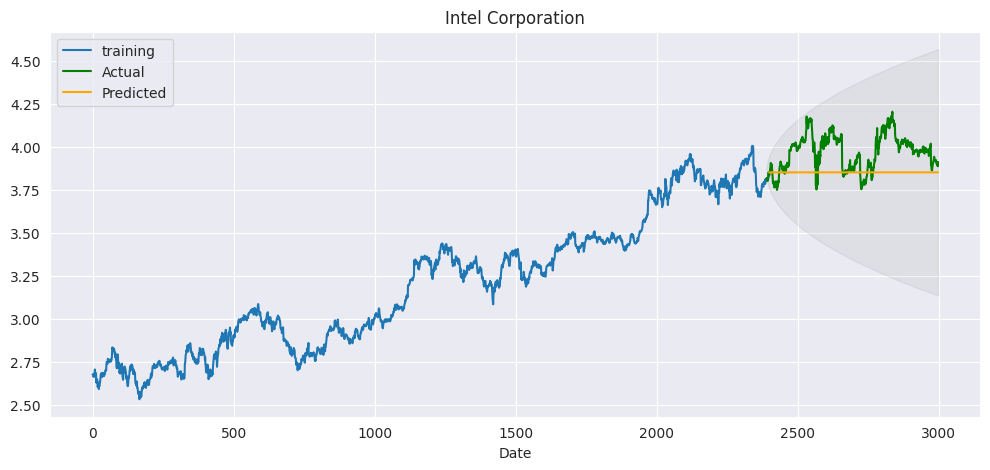

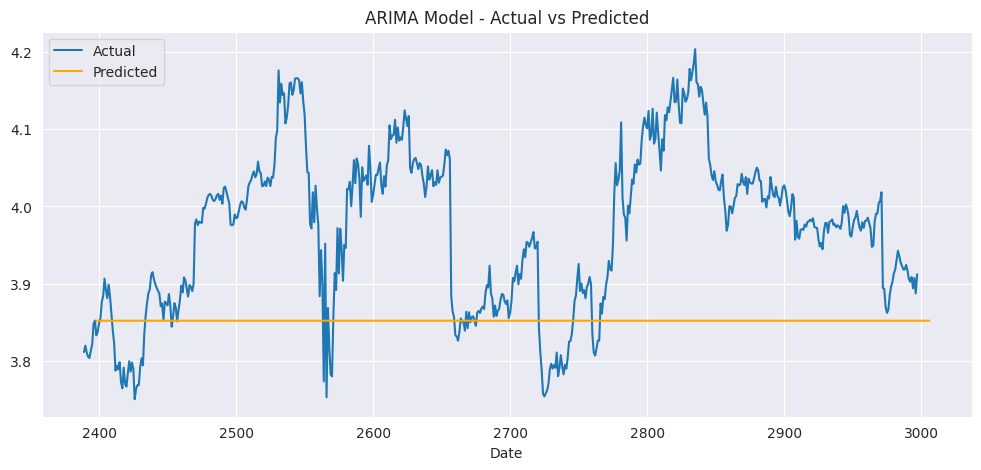

In [27]:
forecast_result = fitted.forecast(steps=609,alpha=0.05)
fc_series = pd.Series(forecast_result, index=test_data.index)

forecast_conf = fitted.get_forecast(steps=609).conf_int()
upper_series = pd.Series(forecast_conf.iloc[:, 1].values, index=test_data.index)
lower_series = pd.Series(forecast_conf.iloc[:, 0].values, index=test_data.index)

plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color='green', label='Actual')
plt.plot(fc_series, color='orange', label='Predicted')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=0.05)
plt.title('Intel Corporation')
plt.xlabel('Date')

plt.legend(loc='upper left')
plt.show()

fc = forecast_results.predicted_mean

plt.figure(figsize=(12, 5), dpi=100)
plt.plot(test_data, label='Actual')
plt.plot(fc, color='orange', label='Predicted')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.show()

**Metrics Evaluation**


In [15]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
forecast_results = fitted.get_forecast(steps=609, alpha=0.05)
fc = forecast_results.predicted_mean
mse = mean_squared_error(test_data, fc)
print('MSE: ' + str(mse))

mae = mean_absolute_error(test_data, fc)
print('MAE: ' + str(mae))

rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: ' + str(rmse))


MSE: 0.02421064004014244
MAE: 0.13050338388466967
RMSE: 0.15559768648711472


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
